In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import plotly.graph_objects as go
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import random

In [2]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [3]:
# Load preprocessed train/test data
# ===============================
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv")
y_test = pd.read_csv("../data/y_test.csv")

In [4]:
# Flatten y if it's a dataframe with one column
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [5]:
with open("../data/label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

print("Classes:", le.classes_)   # ✅ should print ["Absence", "Presence"]


Classes: ['Absence' 'Presence']


In [6]:
# Compute scale_pos_weight
n_negative = (y_train == 0).sum()
n_positive = (y_train == 1).sum()
scale_pos_weight = n_negative / n_positive
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

scale_pos_weight = 1.25


In [7]:
# Train XGBoost with class weight
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight
)

xgb_model.fit(X_train, y_train)

C:\Users\Manzoor\anaconda3\envs\projects\lib\site-packages\xgboost\core.py:158: UserWarning: [16:18:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [8]:
# Predict
y_pred = xgb_model.predict(X_test)


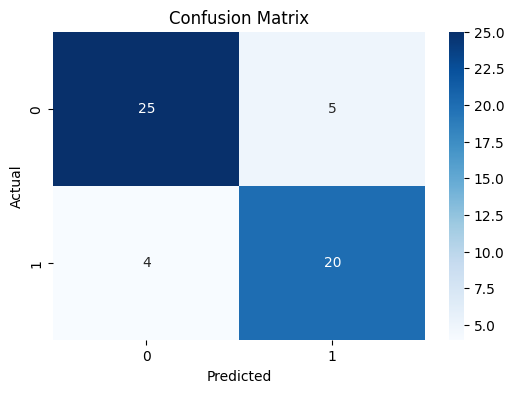

✅ All evaluation results saved in 'result/' folder for Power BI.


In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("../results/confusion_matrix_plot.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ All evaluation results saved in 'result/' folder for Power BI.")

In [10]:
# Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.80      0.83      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



In [11]:
# ---- Classification Report ----
report_dict = classification_report(y_test, y_pred, output_dict=True, digits=4)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv("../results/classification_report.csv", index=True)

In [12]:
# Ensure y_test and y_pred are 1D
y_test_flat = y_test.squeeze()      # works if it's pandas DataFrame/Series
y_pred_flat = np.ravel(y_pred)      # works if it's numpy array

# ---- Predictions (for Power BI) ----
predictions_df = pd.DataFrame({
    "Actual": y_test_flat,
    "Predicted": y_pred_flat
})

predictions_df.to_csv("../results/predictions.csv", index=False)
print("✅ Predictions saved to ../result/predictions.csv")

✅ Predictions saved to ../result/predictions.csv


In [13]:
import pickle

# Save model as .sav
with open("../models/xgboost_model.sav", "wb") as f:
    pickle.dump(xgb_model, f)

print("✅ Model saved as xgboost_model.sav")


✅ Model saved as xgboost_model.sav
